In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
namesofimages = ['farm1.jpg', 'farm2.jpg', 'farm3.jpg', 'farm4.jpg',
'farm5.jpg', 'farm6.jpg', 'farm7.jpg', 'farm8.jpg',
'city1.jpg', 'city2.jpg', 'city3.jpg', 'city4.jpg',
'city5.jpg', 'city6.jpg', 'city7.jpg', 'city8.jpg',
'desert1.jpg', 'desert2.jpg', 'desert3.jpg', 'desert4.jpg',
'desert5.jpg', 'desert6.jpg', 'desert7.jpg', 'desert8.jpg']

In [9]:
def extract_color_percentage(image):
    RGBtuple = np.array(image).mean(axis=(0,1))
    averageRed = RGBtuple[0]
    averageGreen = RGBtuple[1]
    averageBlue = RGBtuple[2]
    
    return [(averageGreen/(averageGreen+averageBlue+averageRed)*100),(averageBlue/(averageGreen+averageBlue+averageRed)*100)]

In [10]:
FarmGList = []
FarmBList = []
for i in range(1,9):
    image = Image.open('images2/images2/farm'+str(i)+'.jpg')
    GBvalues = get_percent_green_red(image)
    FarmGList.append(GBvalues[0])
    FarmBList.append(GBvalues[1])
print(FarmGList,FarmBList)

[38.537916213835416, 38.947876516901914, 37.17674909868626, 38.534940593314346, 38.36885427597768, 37.82235141367888, 35.57784135089085, 36.31826360385042] [27.250258272909438, 24.16674958079473, 29.236929740095714, 25.567274038089728, 26.974448694522916, 34.24372370985558, 26.138973373973663, 32.07925148928169]


In [26]:
CityGList = []
CityBList= []
for i in range(1,9):
    image = Image.open('images2/images2/city'+str(i)+'.jpg')
    GBvalues = get_percent_green_red(image)
    CityGList.append(GBvalues[0])
    CityBList.append(GBvalues[1])
print(CityGList,CityBList)

[33.38467930412881, 31.45798947161084, 32.98215922261616, 33.02142216023482, 31.26774452579913, 36.20055000332057, 33.26393074627567, 33.15564784754933] [33.987007505544774, 31.740954537386983, 30.761097231014695, 40.32948263728943, 37.06804693524618, 35.92237167477091, 28.122414499234154, 31.387493502902842]


In [27]:
DesertGList = []
DesertBList = []
for i in range(1,9):
    image = Image.open('images2/images2/desert'+str(i)+'.jpg')
    GBvalues = get_percent_green_red(image)
    DesertGList.append(GBvalues[0])
    DesertBList.append(GBvalues[1])
print(DesertGList,DesertBList)

[28.899153658542026, 32.8874649778496, 32.17135111200672, 35.209260672644106, 32.71851263163745, 33.65568100129335, 34.41919206452677, 32.732039192104914] [26.478622054789135, 29.461288318761135, 24.749944089149416, 23.17126103798501, 21.56491053354232, 26.387190302313257, 13.749538064681849, 26.438328280357887]


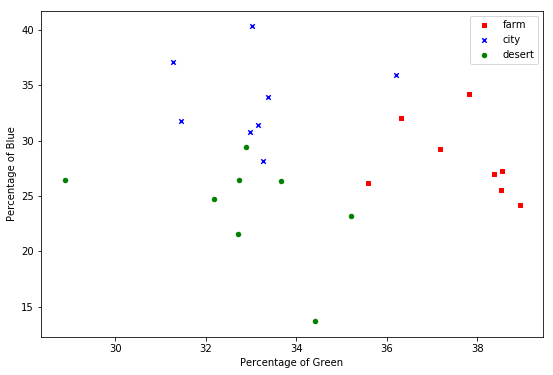

In [29]:
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(x=FarmGList,y=FarmBList,s=20,c='r',marker='s',label='farm')
ax1.scatter(x=CityGList,y=CityBList,s=20,c='b',marker='x',label='city')
ax1.scatter(x=DesertGList,y=DesertBList,s=20,c='g',marker='o',label='desert')

plt.legend(loc='upper right')
plt.xlabel('Percentage of Green')
plt.ylabel('Percentage of Blue')
plt.show()

In [30]:
training_target=['farm', 'farm', 'farm', 'farm',
'farm', 'farm', 'farm', 'farm',
'city', 'city', 'city', 'city',
'city', 'city', 'city', 'city',
'desert', 'desert', 'desert', 'desert',
'desert', 'desert', 'desert', 'desert']

In [31]:
training_data = np.zeros((24,2))

In [32]:
typeList = FarmGList+CityGList+DesertGList
for i in typeList:
    training_data[typeList.index(i),0] = i

In [35]:
typeList2 = FarmBList+CityBList+DesertBList
for i in typeList2:
    training_data[typeList2.index(i),1] = i

In [36]:
training_data

array([[38.53791621, 27.25025827],
       [38.94787652, 24.16674958],
       [37.1767491 , 29.23692974],
       [38.53494059, 25.56727404],
       [38.36885428, 26.97444869],
       [37.82235141, 34.24372371],
       [35.57784135, 26.13897337],
       [36.3182636 , 32.07925149],
       [33.3846793 , 33.98700751],
       [31.45798947, 31.74095454],
       [32.98215922, 30.76109723],
       [33.02142216, 40.32948264],
       [31.26774453, 37.06804694],
       [36.20055   , 35.92237167],
       [33.26393075, 28.1224145 ],
       [33.15564785, 31.3874935 ],
       [28.89915366, 26.47862205],
       [32.88746498, 29.46128832],
       [32.17135111, 24.74994409],
       [35.20926067, 23.17126104],
       [32.71851263, 21.56491053],
       [33.655681  , 26.3871903 ],
       [34.41919206, 13.74953806],
       [32.73203919, 26.43832828]])

In [37]:
from sklearn import neighbors

k1 = neighbors.KNeighborsClassifier(n_neighbors=1,weights='distance')
k1.fit(training_data,training_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='distance')

In [38]:
testGreens = []
testBlues = []
for i in range(1,4):
    image = Image.open('images2/images2/test/test'+str(i)+'.jpg')
    GBvalues = get_percent_green_red(image)
    testGreens.append(GBvalues[0])
    testBlues.append(GBvalues[1])    

In [39]:
testGreens

[48.85005477496365, 33.31403245883729, 33.131045679704876]

In [40]:
testBlues

[22.691319558585406, 34.27726387812507, 12.937774818350162]

In [41]:
test_array = np.zeros((3,2))

In [42]:
test_array

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [43]:
for i in range(3):
    for j in range(2):
        if j == 0:
            test_array[i][0] = testGreens[i]
        elif j == 1:
            test_array[i][1] = testBlues[i]

In [44]:
test_array

array([[48.85005477, 22.69131956],
       [33.31403246, 34.27726388],
       [33.13104568, 12.93777482]])

In [45]:
k1_pred = k1.predict(test_array)

In [46]:
k1_pred

array(['farm', 'city', 'desert'], dtype='<U6')

In [48]:
from tabulate import tabulate

Predicted value - farm


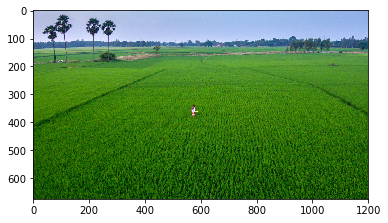

Predicted value - city


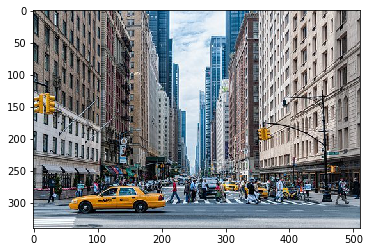

Predicted value - desert


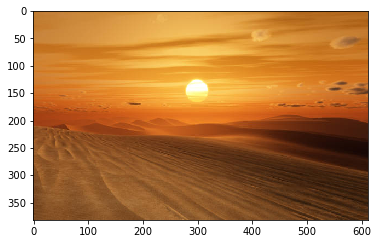

In [274]:
for i in range(1,4):
    image = mpimg.imread('images2/images2/test/test'+str(i)+'.jpg')
    imgplot = plt.imshow(image)
    print("Predicted value - "+k1_pred[i-1])
    plt.show()
